In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### 1. Import data

In [105]:
data = pd.read_csv("data/walmart-preprocessing.csv")
data

,Store,Dept,Weekly_Sales,IsHoliday,DateTime,Week,Month,SpecialDay,Type_A,Type_B,Type_C,CPI,Unemployment,Size,Year
0,1,1,24924.50,0,2010-02-05,5,2,-1,1,0,0,1.018774,0.078201,0.239209,-1.215487
1,1,2,50605.27,0,2010-02-05,5,2,-1,1,0,0,1.018774,0.078201,0.239209,-1.215487
2,1,3,13740.12,0,2010-02-05,5,2,-1,1,0,0,1.018774,0.078201,0.239209,-1.215487
3,1,4,39954.04,0,2010-02-05,5,2,-1,1,0,0,1.018774,0.078201,0.239209,-1.215487
4,1,5,32229.38,0,2010-02-05,5,2,-1,1,0,0,1.018774,0.078201,0.239209,-1.215487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,2012-10-26,43,10,-1,0,1,0,0.539003,0.379281,-0.303489,1.294317
421566,45,94,5203.31,0,2012-10-26,43,10,-1,0,1,0,0.539003,0.379281,-0.303489,1.294317
421567,45,95,56017.47,0,2012-10-26,43,10,-1,0,1,0,0.539003,0.379281,-0.303489,1.294317
421568,45,97,6817.48,0,2012-10-26,43,10,-1,0,1,0,0.539003,0.379281,-0.303489,1.294317


#### 2. Define X and y

In [106]:
X = data.drop(["Weekly_Sales","DateTime"],axis=1)
y = data["Weekly_Sales"]

#### 3. Features Checking

In [107]:
import statsmodels.api as sm

x = sm.add_constant(X)
sum_ = sm.OLS(y,x).fit()
sum_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3454.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:32:21   Log-Likelihood:            -4.8070e+06
No. Observations:              421570   AIC:                         9.614e+06
Df Residuals:                  421557   BIC:                         9.614e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.03e+04    142.214     72.446      0.000       1e+04    1.06e+04
Store         -143.3891      3.051    -47.003      0.000    -149.368    -137.410
Dept           110.3523      1.095    100.737      0.000     108.205     112.499
IsHoliday     1659.7048    306.748      5.411      0.000    1058.488    2260.922
Week          -103.3617     27.496     -3.759      0.000    -157.253     -49.471
Month          645.5361    119.408      5.406      0.000     411.501     879.571
SpecialDay    -363.7994    123.572     -2.944      0.003    -605.997    -121.602
Type_A        1613.6161     90.111     17.907      0.000    1437.002    1790.230
Type_B        1252.7281     65.907     19.007      0.000    1123.552    1381.904
Type_C        7436.4425    127.610     58.275      0.000    7186.331    7686.554
CPI           -944.2025     36.147    -26.121      0.000   -1015.050    -873.355
Unemployment  -436.4870     36.871    -11.838      0.000    -508.753    -364.221
Size          6027.3142     58.112    103.718      0.000    5913.416    6141.213
Year          -104.1357     35.540     -2.930      0.003    -173.792     -34.479
==============================================================================
Omnibus:                   296928.884   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9030579.636
Skew:                           3.020   Prob(JB):                         0.00
Kurtosis:                      24.855   Cond. No.                     1.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.53e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

You can see that in the preprocessing notebook, we dropped the irrelavant data out. So the above statistics are better when seeing its individual p-value. 

#### 4. Split the data into train and test set

In [108]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### 5. Build a model

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.9756344982317652

#### 6. Evaluate the model

Regression model evaluation metrics

1. Root Mean Sqaure Error (RMSE).
2. Mean Absolut Error (MAE).
3. R^2 (R-Square) or coefficient of determination.
4. Cross validation: accuracy.

In [110]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

def evaluate_model(model,y_test,y_pred,X=None,y=None):
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-Squared: {r2*100:.2f}%")
    if X is not None and y is not None:
        cvs_acc = cross_val_score(model,X,y,cv=5)
        print(f"The cross validation accuracy: {np.mean(cvs_acc)*100:.2f}%")

In [8]:
evaluate_model(rf,y_test,y_pred,X,y)

Root Mean Squared Error: 3585.65
Mean Absolute Error: 1395.45
R-Squared: 97.55%
The cross validation accuracy: 71.24%


In [111]:
evaluate_model(rf,y_test,y_pred)

Root Mean Squared Error: 3577.66
Mean Absolute Error: 1394.92
R-Squared: 97.56%


#### Additional-Features Importance

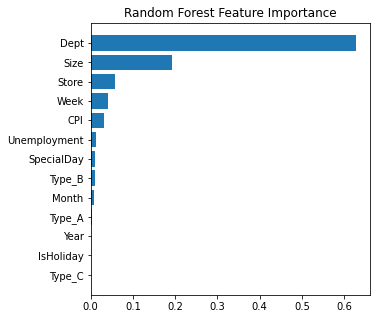

In [112]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

sorted_idx = rf.feature_importances_.argsort()
ax.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
ax.set_title(f"Random Forest Feature Importance");

#### 7. Save the model

In [113]:
import pickle

pickle.dump(rf, open("models/RandomForestModel.pkl", 'wb'))

#### 8. Tune the model with Grid Search

To tune the model parameters, we can't use all the data because it will take long long time to run all possible combination. So we decide to use only 10 percent of the data to find the best parameters. This time we use GridSearchCV to perform the tuning.

In [9]:
data_10 = data.sample(int(len(data)*0.1))

In [10]:
X_10 = data_10.drop(["Weekly_Sales","DateTime"],axis=1)
y_10 = data_10["Weekly_Sales"]

In [11]:
from sklearn.model_selection import train_test_split

X_train_10,X_test_10,y_train_10,y_test_10 = train_test_split(X_10,y_10,test_size=0.2,random_state=5)

In [12]:
from sklearn.model_selection import GridSearchCV,train_test_split

grid = {"n_estimators":[100,200,500],
       "max_depth":[20],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4],
       "min_samples_leaf":[4]}

model = RandomForestRegressor(n_jobs=-1)

gs_model = GridSearchCV(estimator=model,
                       param_grid=grid,
                       cv=5,
                       verbose=2)

gs_model.fit(X_train_10,y_train_10);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200

In [13]:
gs_model.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [14]:
gs_y_preds = gs_model.predict(X_test_10)

#### 8. Use the best parameters to build a model

In [16]:
rf_best_params = RandomForestRegressor(max_depth=20,
                           max_features="auto",
                           min_samples_leaf=4,
                           min_samples_split=4,
                           n_estimators=500,
                           n_jobs=-1)
rf_best_params.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_best_params.score(X_test,y_test)

0.9717973780336344

In [17]:
evaluate_model(rf_best_params,y_test,y_pred)

Root Mean Squared Error: 3585.65
Mean Absolute Error: 1395.45
R-Squared: 97.55%


As you can see the best scores are from the first model that we built with defualt parameters. That's why Random Forest is a good model and easy to use because the defualt model usually gives the good result.

#### 9. Try with other models

1. Linear Regression.
2. K-Nearest Neighbors.
3. Decision Tree .
4. Artificial Neural Networks.

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
y_reg = reg.predict(X_test)
evaluate_model(reg,y_test,y_reg)

Root Mean Squared Error: 21831.84
Mean Absolute Error: 14597.85
R-Squared: 9.27%


As we can see from RMSE of Linear Regression, the output is not good enough because the some columns in the data might not be a linear. So when we apply Linear Regression to perform a model, the output is what we expected.

In [29]:
from sklearn.neighbors import KNeighborsRegressor # KSN

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)
evaluate_model(knn,y_test,y_knn)

Root Mean Squared Error: 12552.49
Mean Absolute Error: 6873.98
R-Squared: 70.01%


As we can see from RMSE of K-Nearest Neighbors, the output is better than Linear Regression but it's not that good. Maybe the data might perform well in this model.

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)
evaluate_model(dt,y_test,y_dt)

Root Mean Squared Error: 4531.43
Mean Absolute Error: 1720.53
R-Squared: 96.09%


As we can see from RMSE of Decision Tree, we get the better score compare to the two models before.

In [42]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=50,input_dim=X_train.shape[1],activation="relu"))
model.add(tf.keras.layers.Dense(units=50,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="linear"))
model.compile(optimizer="adam",loss='mean_squared_error',metrics=["mean_squared_error"])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_mean_squared_error",patience=3)

r = model.fit(x=X_train,y=y_train,epochs=150,batch_size=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/150
33726/33726 [==============================] - 23s 685us/step - loss: 489719988.2805 - mean_squared_error: 489719988.2805 - val_loss: 426777568.0000 - val_mean_squared_error: 426777568.0000
Epoch 2/150
33726/33726 [==============================] - 24s 713us/step - loss: 413646636.8837 - mean_squared_error: 413646636.8837 - val_loss: 407095936.0000 - val_mean_squared_error: 407095936.0000
Epoch 3/150
33726/33726 [==============================] - 22s 665us/step - loss: 396083237.5438 - mean_squared_error: 396083237.5438 - val_loss: 398697216.0000 - val_mean_squared_error: 398697216.0000
Epoch 4/150
33726/33726 [==============================] - 24s 711us/step - loss: 392965305.9583 - mean_squared_error: 392965305.9583 - val_loss: 391564256.0000 - val_mean_squared_error: 391564256.0000
Epoch 5/150
33726/33726 [==============================] - 26s 773us/step - loss: 378137601.3798 - mean_squared_error: 378137601.3798 - val_loss: 385215776.0000 - val_mean_squared_error: 38521

In [88]:
_,mean_squared_error = model.evaluate(X_test,y_test,verbose=0)
y_ann = model.predict(X_test).reshape(-1,)
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error):.2f}")

Root Mean Squared Error: 18424.11
